In [1]:
# 핑크색 warning 안내문 방지 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 분석에 사용할 라이브러리를 불러옵니다
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

In [4]:
import glob
path = glob.glob('data/*.csv')
path

['data\\olist_customers_dataset.csv',
 'data\\olist_geolocation_dataset.csv',
 'data\\olist_orders_dataset.csv',
 'data\\olist_order_items_dataset.csv',
 'data\\olist_order_payments_dataset.csv',
 'data\\olist_order_reviews_dataset.csv',
 'data\\olist_products_dataset.csv',
 'data\\olist_sellers_dataset.csv',
 'data\\product_category_name_translation.csv']

In [5]:
# 각각의 데이터셋 import 
df_customers = pd.read_csv(path[0])
df_geolocation = pd.read_csv(path[1])
df_orders = pd.read_csv(path[2])
df_items = pd.read_csv(path[3])
df_payments = pd.read_csv(path[4])
df_reviews = pd.read_csv(path[5])
df_products = pd.read_csv(path[6])
df_sellers = pd.read_csv(path[7])
df_category = pd.read_csv(path[8])

In [6]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [7]:
df_orders
# 주문건수 99441개 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [8]:
df_items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [9]:
# order_id 한개에 (주문 한개에 여러 상품을 주문한게 있어서 (df_orders의 order_id 갯수랑 일치하지 않는 것)
df_items['order_id'].nunique()

98666

In [10]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [11]:
df = df_orders.merge(df_customers, on = 'customer_id', how = 'left')
df = df.merge(df_items, on  = 'order_id', how = 'outer')
df = df.merge(df_products, on = 'product_id', how = 'outer')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,...,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,fb9310710003399b031add3e55f34719,3318,...,356.00,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
113421,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,fb9310710003399b031add3e55f34719,3318,...,356.00,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
113422,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,a49e8e11e850592fe685ae3c64b40eca,83870,...,55.90,15.14,instrumentos_musicais,34.0,372.0,2.0,300.0,16.0,6.0,12.0
113423,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,...,72.00,13.08,beleza_saude,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0


In [12]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
product_category_name            2378
product_name_lenght              2378
product_description_lenght       2378
product_photos_qty               2378
product_weight_g                  793
product_length_cm                 793
product_height_cm                 793
product_width_cm                  793
dtype: int64

In [13]:
# 왜 이렇게 null이 많지?
df[df['order_item_id'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
7666,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00,41fc647b8c6bd979b1b6364b60471b50,89288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7667,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00,0e634b16e4c585acbd7b2e8276ce6677,11701,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7668,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00,596ed6d7a35890b3fbac54ec01f69685,2318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7669,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaN,2018-02-06 00:00:00,2349bbb558908e0955e98d47dacb7adb,48607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7670,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00,4fa4365000c7090fcb8cad5713c6d3db,1151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8436,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00,a33e0969408919ba06779f497ead93ec,7025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8437,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00,e90598185d2427a35e32ef241a5c04aa,11075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8438,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00,d05c44a138277ad325d915c6b7ccbcdf,5344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8439,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00,e72a90a2b29fe1a8795b284aaaa3246f,22723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# df['order_status'] 에서 unavailable , canceled는 제외해야 고객의 진정한 구매 실적

In [14]:
customer_vaild  = df[~ df['order_status'].str.contains('unavailable') & ~ df['order_status'].str.contains('canceled')]
customer_vaild 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,...,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,fb9310710003399b031add3e55f34719,3318,...,356.00,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
113421,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,fb9310710003399b031add3e55f34719,3318,...,356.00,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
113422,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,a49e8e11e850592fe685ae3c64b40eca,83870,...,55.90,15.14,instrumentos_musicais,34.0,372.0,2.0,300.0,16.0,6.0,12.0
113423,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,...,72.00,13.08,beleza_saude,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0


In [15]:
# seller_id null 인거 다시 찾ㅅ기
customer_vaild.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  20
order_delivered_carrier_date      728
order_delivered_customer_date    1920
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       8
product_id                          8
seller_id                           8
shipping_limit_date                 8
price                               8
freight_value                       8
product_category_name            1597
product_name_lenght              1597
product_description_lenght       1597
product_photos_qty               1597
product_weight_g                   26
product_length_cm                  26
product_height_cm                  26
product_width_cm                   26
dtype: int64

In [17]:
customer_vaild[customer_vaild['order_approved_at'].isnull()]
# 얘네는 order_approved_at 이 null 이지만 order_status가 canceled, unavailable 아닌거 . 일단 세일즈로 집계해도될 듯 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
7723,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaN,NaN,NaN,2018-01-11 00:00:00,55fbb57fd54c35a38c80c2a032a6ca6e,15300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7740,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaN,NaN,NaN,2018-03-07 00:00:00,2e015e68fbfa36910263df5384e8e45c,73401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7833,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaN,NaN,NaN,2017-12-12 00:00:00,355862aa14375fe3950ee04fef9c7a53,22621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8095,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaN,NaN,NaN,2018-01-08 00:00:00,10d5890ed5e7ec78a7db23b5ac579b17,93025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8119,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaN,NaN,NaN,2017-12-01 00:00:00,161e5b2b4513edb336986a8909218365,87720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17293,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00,7e1a5ca61b572d76b64b6688b9f96473,62700,...,79.99,26.82,cool_stuff,54.0,1012.0,1.0,1200.0,42.0,25.0,15.0
17295,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00,c8822fce1d0bfa7ddf0da24fff947172,27945,...,79.99,15.77,cool_stuff,54.0,1012.0,1.0,1200.0,42.0,25.0,15.0
17371,2babbb4b15e6d2dfe95e2de765c97bce,74bebaf46603f9340e3b50c6b086f992,delivered,2017-02-18 17:15:03,NaN,2017-02-22 11:23:11,2017-03-03 18:43:43,2017-03-31 00:00:00,f79be7c08dd24b72d34634f1b89333a4,65110,...,79.99,26.82,cool_stuff,54.0,1012.0,1.0,1200.0,42.0,25.0,15.0
38664,51eb2eebd5d76a24625b31c33dd41449,07a2a7e0f63fd8cb757ed77d4245623c,delivered,2017-02-18 15:52:27,NaN,2017-02-23 03:09:14,2017-03-07 13:57:47,2017-03-29 00:00:00,79af1bbf230a2630487975aa5d7d6220,37660,...,59.90,17.16,moveis_decoracao,59.0,438.0,1.0,1200.0,30.0,5.0,20.0
42954,88083e8f64d95b932164187484d90212,f67cd1a215aae2a1074638bbd35a223a,delivered,2017-02-18 22:49:19,NaN,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21 00:00:00,bc1896dc77f49e6dec880445a9b443a3,21020,...,49.00,14.52,telefonia,61.0,440.0,1.0,250.0,18.0,3.0,28.0


In [18]:
pd.set_option('display.max_columns', None)

In [19]:
customer_vaild

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,fb9310710003399b031add3e55f34719,3318,sao paulo,SP,1.0,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,2017-08-17 21:35:26,356.00,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
113421,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,fb9310710003399b031add3e55f34719,3318,sao paulo,SP,2.0,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,2017-08-17 21:35:26,356.00,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
113422,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,a49e8e11e850592fe685ae3c64b40eca,83870,campo do tenente,PR,1.0,3d2c44374ee42b3003a470f3e937a2ea,ce248b21cb2adc36282ede306b7660e5,2017-12-27 10:09:52,55.90,15.14,instrumentos_musicais,34.0,372.0,2.0,300.0,16.0,6.0,12.0
113423,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1.0,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb2570560

In [21]:
# 상품 무게나 이런거 필요 없으니까 슬라이싱으로 보고싶은 컬럼 범위지정 
customer_vaild.iloc[ : , :22]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,fb9310710003399b031add3e55f34719,3318,sao paulo,SP,1.0,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,2017-08-17 21:35:26,356.00,18.12,esporte_lazer,53.0,1105.0,1.0
113421,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,fb9310710003399b031add3e55f34719,3318,sao paulo,SP,2.0,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,2017-08-17 21:35:26,356.00,18.12,esporte_lazer,53.0,1105.0,1.0
113422,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,a49e8e11e850592fe685ae3c64b40eca,83870,campo do tenente,PR,1.0,3d2c44374ee42b3003a470f3e937a2ea,ce248b21cb2adc36282ede306b7660e5,2017-12-27 10:09:52,55.90,15.14,instrumentos_musicais,34.0,372.0,2.0
113423,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1.0,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 09:54:05,72.00,13.08,beleza_saude,50.0,1517.0,1.0


In [23]:
customer_vaild['order_id'].nunique()

98207

In [24]:
customer_vaild['customer_id'].nunique()

98207

In [25]:
# 그렇다면 고객별로 구매 빈도수 측정해보기 
customer_vaild['customer_unique_id'].value_counts().head(30)
# 24번 누적구매한 고객이 1등 고객 

c8460e4251689ba205045f3ea17884a1    24
4546caea018ad8c692964e3382debd19    21
698e1cf81d01a3d389d96145f7fa6df8    20
c402f431464c72e27330a67f7b94d4fb    20
0f5ac8d5c31de21d2f25e24be15bbffb    18
8d50f5eadf50201ccdcedfb9e2ac8455    16
11f97da02237a49c8e783dfda6f50e8e    15
eae0a83d752b1dd32697e0e7b4221656    15
3e43e6105506432c953e165fb2acf44c    14
31e412b9fb766b6794724ed17a41dfa6    14
f7ea4eef770a388bd5b225acfc546604    14
d97b3cfb22b0d6b25ac9ed4e9c2d481b    13
7582a5a77fc2976628f46a13ec91b375    13
86df00dc5fd68f4dd5d5945ca19f3ed6    12
9eca552063680b7cd2ed0e8aea002b21    12
4644f1b187e390a08b4c66fb16c91364    12
d3383e8df3cd44cd351aecff92e34627    12
07ff81a9676efa0286ddd3f09e7c0063    12
ca77025e7201e3b30c44b472ff346268    12
37bc3d463e2a0024012a7fa587597a3c    12
ce9f8b9c31d83341764708396ac7e38b    12
4d99682572b7b5932340a0bce676c18c    12
a5c6335399140e986db84120c425adf0    11
fe2b2f70f3dc31c23319ae1029eac77f    11
efce1ab3e96ccab8b1b464326bd22417    11
70ad91901ad4330af432978ff

In [ ]:
# 구매금액계산
# TotalPrice 는 RFM 중 MonetaryValue

In [26]:
customer_vaild['order_item_id'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6., 11.,  7.,  8.,  9., 10., 12., nan,
       13., 14., 15., 16., 17., 18., 19., 20., 21.])

In [28]:
# 어차피 구매 수량은 'order_item_id	'별 1개씩이니까 새 컬럼 만들어서 1 값으로 싹 통일
customer_vaild['Quantity'] = 1
customer_vaild

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Quantity
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,fb9310710003399b031add3e55f34719,3318,sao paulo,SP,1.0,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,2017-08-17 21:35:26,356.00,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0,1
113421,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,fb9310710003399b031add3e55f34719,3318,sao paulo,SP,2.0,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,2017-08-17 21:35:26,356.00,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0,1
113422,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,a49e8e11e850592fe685ae3c64b40eca,83870,campo do tenente,PR,1.0,3d2c44374ee42b3003a470f3e937a2ea,ce248b21cb2adc36282ede306b7660e5,2017-12-27 10:09:52,55.90,15.14,instrumentos_musicais,34.0,372.0,2.0,300.0,16.0,6.0,12.0,1
113423,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1.0,ac35486adb7b02598c182c2ff2e0

In [29]:
customer_vaild['totalprice'] = customer_vaild['Quantity'] * customer_vaild['price']

In [30]:
customer_vaild['totalprice'].describe()
# 평균 120헤알 
# 최댓값이 6735..?

count    112101.000000
mean        120.377166
std         182.637401
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: totalprice, dtype: float64

In [31]:
customer_vaild[customer_vaild['totalprice'] > 6700]
# 진짜 있긴 있네... 뭐냐 저거 .... 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Quantity,totalprice
79197,0812eb902a67711a1cb742b3cdaa65ae,c6e2731c5b391845f6800c97401a43a9,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09 00:00:00,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS,1.0,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,1,6735.0
84954,fefacc66af859508bf1a7934eab1e97f,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10 00:00:00,459bef486812aa25204be022145caa62,29066,vitoria,ES,1.0,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,1,6729.0


### 중복데이터 제거 

In [32]:
print(customer_vaild.shape)
copy = customer_vaild.drop_duplicates().copy()
copy.shape
# 중복치 없당

(112109, 28)


(112109, 28)

# RFM 계산

In [33]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112109 entries, 0 to 113424
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112109 non-null  object 
 1   customer_id                    112109 non-null  object 
 2   order_status                   112109 non-null  object 
 3   order_purchase_timestamp       112109 non-null  object 
 4   order_approved_at              112089 non-null  object 
 5   order_delivered_carrier_date   111381 non-null  object 
 6   order_delivered_customer_date  110189 non-null  object 
 7   order_estimated_delivery_date  112109 non-null  object 
 8   customer_unique_id             112109 non-null  object 
 9   customer_zip_code_prefix       112109 non-null  int64  
 10  customer_city                  112109 non-null  object 
 11  customer_state                 112109 non-null  object 
 12  order_item_id                 

In [34]:
copy.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'Quantity', 'totalprice'],
      dtype='object')

In [35]:
# order_purchase_timestamp -> 고객의 구매 일자
copy['order_purchase_timestamp'] = pd.to_datetime(copy['order_purchase_timestamp'])

In [36]:
# Recency 계산을 위해 해당 주문에서 가장 최근 구매가 일어난 시간을 가져옵니다.
# 최근 거래 기준일(last_timestamp)을 만들기 위해 timedelta로 날짜를 더해줍니다.(최소값:1 설정) 
last_timestamp = copy['order_purchase_timestamp'].max() + dt.timedelta(days = 1)
last_timestamp

Timestamp('2018-09-04 09:06:57')

### 고객별 Recency, Frequency, Monetary 값 구하기

In [37]:
# RFM 값을 정의합니다.
# Recency : 최근 거래 기준일(last_timestamp)과 고객별 최근 구매한 날짜(x.max())와 차이값
# Frequency : 구매 빈도수
# Monetary : 총 구매 금액

In [38]:
rfm = copy.groupby(['customer_unique_id']).agg({'order_purchase_timestamp' : lambda x : (last_timestamp - x.max()).days,
                                                 'order_id' : 'count',
                                                'totalprice' : 'sum'})
rfm.shape

(94990, 3)

In [39]:
rfm

,order_purchase_timestamp,order_id,totalprice
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
0000f46a3911fa3c0805444483337064,542,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
0004aac84e0df4da2b147fca70cf8255,293,1,180.00
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,452,2,1570.00
fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89
ffff371b4d645b6ecea244b27531430a,573,1,89.90


In [40]:
rfm.rename(columns = {'order_purchase_timestamp' : 'Recency', 
                      'order_id' : 'Frequency', 
                      'totalprice': 'MonetaryValue'},
            inplace = True)
rfm

,Recency,Frequency,MonetaryValue
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
0000f46a3911fa3c0805444483337064,542,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
0004aac84e0df4da2b147fca70cf8255,293,1,180.00
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,452,2,1570.00
fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89
ffff371b4d645b6ecea244b27531430a,573,1,89.90


In [41]:
rfm['Frequency'].unique()

array([ 1,  2,  4,  3,  7,  5,  6, 12, 10,  8, 18, 15,  9, 14, 11, 21, 20,
       13, 16, 24], dtype=int64)

In [42]:
rfm.describe()

,Recency,Frequency,MonetaryValue
count,94990.000000,94990.000000,94990.000000
mean,243.448374,1.180219,142.061277
std,152.999947,0.620578,216.070479
min,1.000000,1.000000,0.000000
25%,119.000000,1.000000,47.882500
50%,224.000000,1.000000,89.810000
75%,352.000000,1.000000,155.000000
max,729.000000,24.000000,13440.000000


# RFM 모형
* Scoring 기법: RFM의 요인을 각각 5등급으로 등간격으로 분류하는 방법이다.
* 현재 개발된 RFM 모형은 크게 4가지로 분류 할 수 있다. 이 문서의 내용들은 정설이 아니며 신뢰하기 어려움을 전제로 참고해야한다.
    * 모델1. RFM 각 요소의 20% rule의 적용
    * 모델2. 비율 척도에 의한 양적인 정도의 차이에 따른 등간격의 5등급 분류
    * 모델3. 상하 20%를 제외한 등간격 척도에 의한 그룹 분류
    * 모델4. 군집 분석에 의한 각 요소 별 5개의 그룹 분류
* frequency 가 1인게 대부분이라 pd.cut / pd.qcut 은 x 
https://zephyrus1111.tistory.com/13

In [46]:
list(range(1, 6))

[1, 2, 3, 4, 5]

In [47]:
list(range(5, 0, -1))

[5, 4, 3, 2, 1]

In [48]:
# Recency 는 최근일수록 높은 점수
# Frequency, MonetaryValue 는 값이 클 수록 높은 점수
r_labels = list(range(5, 0, -1))
f_labels = list(range(1, 6))
m_labels = list(range(1, 6))
cut_size = 5

In [49]:
rfm.sample(3)

,Recency,Frequency,MonetaryValue
customer_unique_id,,,
93169008161230a88dc9e75d9971bce7,77,1,239.9
707a5179306d8c8221d739592a602ddb,388,1,75.9
702cb5bfb50fc8056bd2d615b3e2f014,323,1,45.9


In [50]:
rfm['Frequency'].unique()

array([ 1,  2,  4,  3,  7,  5,  6, 12, 10,  8, 18, 15,  9, 14, 11, 21, 20,
       13, 16, 24], dtype=int64)

In [52]:
r_cut = pd.qcut(rfm['Recency'], q=cut_size, labels = r_labels)
f_cut = pd.qcut(rfm['Frequency'], q=cut_size, labels = f_labels)
m_cut = pd.qcut(rfm['MonetaryValue'], q=cut_size, labels = m_labels)
# assign 메소드로 여러변수 한번에 만들기 
rfm = rfm.assign(R = r_cut, F = f_cut,  M =  m_cut)
# 이거 하려고 했는데 FREQUENCY 대부분 1이라 5등급으로 나눌 수 없어서 군집분석으로 구간 추론하기 

ValueError: Bin edges must be unique: array([ 1.,  1.,  1.,  1.,  1., 24.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [62]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94990 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        94990 non-null  int64  
 1   Frequency      94990 non-null  int64  
 2   MonetaryValue  94990 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 4.9+ MB


In [53]:
rfm.describe()

,Recency,Frequency,MonetaryValue
count,94990.000000,94990.000000,94990.000000
mean,243.448374,1.180219,142.061277
std,152.999947,0.620578,216.070479
min,1.000000,1.000000,0.000000
25%,119.000000,1.000000,47.882500
50%,224.000000,1.000000,89.810000
75%,352.000000,1.000000,155.000000
max,729.000000,24.000000,13440.000000


In [69]:
rfm.shape

(94990, 3)

In [67]:
# Frequency 컬럼에서 데이터가 1 인 row의 갯수가 83226개임... 
rfm[rfm['Frequency'].astype(str).str.contains('1')].count()

Recency          83226
Frequency        83226
MonetaryValue    83226
dtype: int64

# Frequency 관리가 xxxx 
* 평균 1.18
frequency 값이 1인게 전체 로우 94990개 중 83226개..  => rfm 분석 하는 의미가 있나? 
rfm 분석이 유의미 하려면 retention 관리가 먼저 진행되어야 한다고 봄 


<AxesSubplot:>

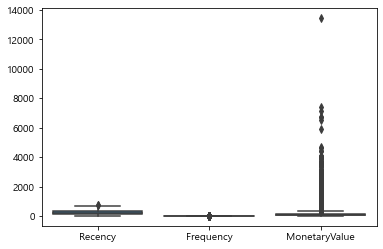

In [54]:
sns.boxplot(data = rfm)

## RFM 분석 - KMEANS

* frequency 가 1인게 대부분이라 pd.cut / pd.qcut 은 x 
* 모델4. 군집 분석에 의한 각 요소 별 5개의 그룹 분류

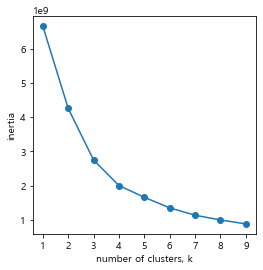

In [43]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(rfm)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

* k개수가 3에서 완만하게 변함. 군집을 3개로 하는게 좋을 듯 ?

In [44]:
# K-Means 모델과 군집 예측값을 생성
clust_model = KMeans(n_clusters = 3,
                    n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
                    , random_state = 42
                    , algorithm='auto')
clust_model.fit(rfm) # unsupervised learning 
# 결과 값을 변수에 저장 
centers = clust_model.cluster_centers_ # 각 군집의 중심점 
pred = clust_model.predict(rfm) # 각 예측군집 
print(pd.DataFrame(centers)) 
print(pred[:10])

            0         1            2
0  133.151406  1.169972   113.560758
1  392.789164  1.163074   111.535408
2  248.170016  1.566188  1002.294434
[0 0 1 1 1 0 0 0 1 0]


In [45]:
# 원래 데이터에 예측된 군집 붙이기
clust_rfm = rfm.copy()
clust_rfm['clust'] = pred
clust_rfm.sample(3)

,Recency,Frequency,MonetaryValue,clust
customer_unique_id,,,,
1a1d480287e0150cf2ed5371d28cf2fd,212,1,109.9,0
966b5b87d2d0342c86217c18ad54573f,519,1,22.5,1
ac84dd1f34eabf33db9e5637fe81bcc0,117,1,35.9,0


# qcut -> 3개의 구간으로 등급을 나누어주어야함.. 리텐션이 너무 낮아서... 1에 몰림

In [ ]:
list(range(1, 4))

In [ ]:
list(range(3, 0, -1))

In [ ]:
# Recency 는 최근일수록 높은 점수
# Frequency, MonetaryValue 는 값이 클 수록 높은 점수
r_scores = list(range(3, 0, -1))
f_scores = list(range(1, 4))
m_scores = list(range(1, 4))
cut_size = 3

In [ ]:
r_cut = pd.qcut(rfm['Recency'], q=cut_size, labels = r_scores)
f_cut = pd.qcut(rfm['Frequency'], q=cut_size, labels = f_scores)
m_cut = pd.qcut(rfm['MonetaryValue'], q=cut_size, labels = m_scores)
# assign 메소드로 여러변수 한번에 만들기 
rfm = rfm.assign(R = r_cut, F = f_cut,  M =  m_cut)